#University Rankings and Insights

University ranking data from 2011-2016 was taken from the Kaggle website.  This notebook is split into three sections: data cleaning, analysis, and machine learning practice.

##Clean Data

Read in the data and assess columns with missing values and value types.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('chained_assignment',None)
%matplotlib inline
import matplotlib.pyplot as plt

university = pd.read_csv("/Users/matthu24/.spyder2-py3/University.csv", encoding='ISO-8859-1')
print(university.head(3))

  world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   

   teaching international  research  citations income total_score  \
0      99.7          72.4      98.7       98.8   34.5        96.1   
1      97.7          54.6      98.0       99.9   83.7          96   
2      97.8          82.3      91.4       99.9   87.5        95.6   

  num_students  student_staff_ratio international_students female_male_ratio  \
0       20,152                  8.9                    25%               NaN   
1        2,243                  6.9                    27%           33 : 67   
2       11,074                  9.0                    33%           37 : 63   

   year  
0  2011  
1  2011  
2  2011  


In [2]:
missing_values = university.isnull().sum()
print(missing_values)
describe = university.describe()
print(describe)

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64
          teaching     research    citations  student_staff_ratio         year
count  2603.000000  2603.000000  2603.000000          2544.000000  2603.000000
mean     37.801498    35.910257    60.921629            18.445283  2014.075682
std      17.604218    21.254805    23.073219            11.458698     1.685733
min       9.900000     2.900000     1.200000             0.600000  2011.000000
25%      24.700000    19.600000    45.500000            11.975000  2013.000000
50%      33.900000    30.500000    62.500000            16.100000  2014.000000
75%      46.40

The following columns have missing values(indicated by either "-" or "NaN", which will need to be filled in with either the median value of the column or with 50:50 for female_male_ratio: "num_students","student_staff_ratio","international_students","female_male_ratio"

Describe method only shows columns that have numerical value types such int or float.  This means the following columns have string values that need to be converted to floats: "world rank","international","income","total_score","num_students","international_students","female_male_ratio"

Additionally, the num-students column has commas in each value, meaning we need to take those out before converting the string to a float.

Similarly, the international_students column has percent signs in each value that need to be taken out.

In [3]:
def remove_dash(row):
    if row[column] == '-':
        
        return 0
    else:
        return row[column]
        
def to_float(row):
    return float(row[column])
    
def fill_median(row):
    if row[column] == 0:
        return median
    else:
        return row[column]

def remove_comma(row):
    if "," in row[column]:
        return row[column].replace(",","")
    else:
        return row[column]

def remove_percent(row):
    if "%" in row[column]:
        return row[column].replace("%","")
    else:
        return row[column]

In [4]:
columns = ["international","income","total_score","student_staff_ratio"]
for column in columns:
    #need to remove dash first to convert to float
    university[column]= university.apply(remove_dash,axis = 1)   
    university[column]= university.apply(to_float,axis = 1)
    
    #replace NaN with zero, find median of series without the zeroes, then
    #replace the zeroes with the median
    university[column]= university[column].fillna(0)
    median = university[column][university[column] != 0].median()
    university[column] = university.apply(fill_median,axis =1)

#These columns have either a comma or a percentage sign in the string values, so I wanted to 
#with them separately.
columns = ["international_students","num_students"]
for column in columns:
    university[column] = university[column].fillna("0") 
    university[column] = university.apply(remove_percent,axis = 1)
    university[column] = university.apply(remove_comma,axis = 1)
    university[column] = university.apply(to_float,axis = 1)   

    median = university[column][university[column] != 0].median()
    university[column] = university.apply(fill_median,axis =1)
    
print(university.head(1))

  world_rank     university_name                   country  teaching  \
0          1  Harvard University  United States of America      99.7   

   international  research  citations  income  total_score  num_students  \
0           72.4      98.7       98.8    34.5         96.1         20152   

   student_staff_ratio  international_students female_male_ratio  year  
0                  8.9                      25               NaN  2011  


In [5]:
#Check
describe = university.describe()
print(describe)

          teaching  international     research    citations       income  \
count  2603.000000    2603.000000  2603.000000  2603.000000  2603.000000   
mean     37.801498      52.001537    35.910257    60.921629    48.311564   
std      17.604218      22.065792    21.254805    23.073219    20.393490   
min       9.900000       7.100000     2.900000     1.200000    24.200000   
25%      24.700000      33.500000    19.600000    45.500000    33.600000   
50%      33.900000      50.300000    30.500000    62.500000    41.000000   
75%      46.400000      69.000000    47.250000    79.050000    56.000000   
max      99.700000     100.000000    99.400000   100.000000   100.000000   

       total_score   num_students  student_staff_ratio  \
count  2603.000000    2603.000000          2603.000000   
mean     57.774568   23805.244333            18.392124   
std       8.903851   17480.190768            11.333420   
min      41.400000     462.000000             0.600000   
25%      56.000000   1280

We have converted to float and filled out missing values for 10 out of 12 columns.  All that is left is "world rank" and "male to female ratio".  The male to female ratios are currently string values with the female percentage, then the colon, then the male percentage.  I want to split the male percentage and female percentage into two separate columns.  

In [6]:
def female_ratio(row):
    return row["female_male_ratio"][:2]

def male_ratio(row):
    return row["female_male_ratio"][3:5]
    
def remove_spaces(row):
    return row["female_male_ratio"].replace(" ","")
        
def remove_dash_gender(row):
    if "-" in row["female_male_ratio"]:
        return row["female_male_ratio"].replace("-","50:50")  
    else:
        return row["female_male_ratio"]

def gender_float(row):
    if type(row[column]) == str:
        return float(row[column])
    else:
        return row[column]

university["female_male_ratio"] = university["female_male_ratio"].fillna("50:50")
university["female_male_ratio"] = university.apply(remove_dash_gender,axis = 1)
university["female"] = university.apply(female_ratio,axis =1)
university["female_male_ratio"] = university.apply(remove_spaces,axis =1)
university["male"] = university.apply(male_ratio,axis =1)

#some rare columns don't have the same colon format, but instead have a decimal value, 
#presumably to denote the percentage of female students

#****Warning
for i in range(len(university)):
    if university["female_male_ratio"].iloc[i][0] == "0":
        female_percent = float(university["female_male_ratio"].iloc[i])*100       
        university["female"].iloc[i] = female_percent       
        university["male"].iloc[i] = 100-female_percent
#****Warning


university = university[university["male"]!=":0"]

#male and female columns are ready to be converted to floats
columns = ["female","male"]
for column in columns:
    university[column] = university.apply(gender_float,axis = 1)



In [7]:
#After the first 200 schools for each year, the column world rank only shows the range.
Top_200_filter = []
for i in university["world_rank"]:
    if len(i)>3:
        Top_200_filter.append(False)
    else:
        Top_200_filter.append(True)
university_200= university[Top_200_filter]

def DF_float(row):
    return float(row["world_rank"])
  

#warning spot ***
#cols = ['col1', 'col2', 'col3']
#df.loc[:, cols] = df[cols].applymap(some_function)
#df.loc[:, cols] = df.loc[:, cols].applymap(some_function) 
university_200.loc[:,"world_rank"] = university_200["world_rank"].astype(float)
#warning spot ****

describe = university_200.describe()
print(describe)



        world_rank     teaching  international     research    citations  \
count  1201.000000  1201.000000    1201.000000  1201.000000  1201.000000   
mean    100.233972    50.730808      59.409742    52.252040    76.928726   
std      57.634735    16.912699      21.144480    19.661541    15.535493   
min       1.000000    15.900000      14.800000    13.100000     8.600000   
25%      50.000000    38.300000      42.300000    37.100000    66.700000   
50%     100.000000    47.500000      59.200000    48.500000    78.800000   
75%     150.000000    60.200000      77.500000    64.700000    89.200000   
max     200.000000    99.700000     100.000000    99.400000   100.000000   

            income  total_score   num_students  student_staff_ratio  \
count  1201.000000  1201.000000    1201.000000          1201.000000   
mean     52.688593    59.846128   23843.400500            15.934971   
std      21.774341    12.803446   13532.498897             9.362282   
min      24.200000    41.400000

So concludes the data cleaning.  All columns are converted to float values and have missing values filled in.  University_200 dataframe is what we will use for further exploration and analysis.  

University_200 has the top 200 schools for each year, from year 2011-2016.  

Use correlation method to see how much each column is correlated to the rest of the columns.  1.0 means perfect correlation.  From the data below, it seems that teaching and research columns are directly related to the total score and world rank.  Other columns more indirectly related to world rank and total score include citations, student_staff_ratio, income and international students. 

In [8]:
correlation = university_200.corr()
print(correlation)

                        world_rank  teaching  international  research  \
world_rank                1.000000 -0.807394      -0.094623 -0.831215   
teaching                 -0.807394  1.000000      -0.075170  0.892144   
international            -0.094623 -0.075170       1.000000  0.028540   
research                 -0.831215  0.892144       0.028540  1.000000   
citations                -0.515432  0.221300       0.068625  0.190185   
income                   -0.196267  0.214315       0.010932  0.270004   
total_score              -0.917059  0.894085       0.123726  0.904166   
num_students             -0.079633  0.104326      -0.194769  0.176000   
student_staff_ratio       0.237822 -0.295101       0.136487 -0.168858   
international_students   -0.190148  0.100834       0.764989  0.137550   
year                     -0.000092 -0.098352       0.180940 -0.041708   
female                    0.069758 -0.183403       0.031408 -0.155797   
male                     -0.069758  0.183403      -

##Analyze

#1. Which countries have the most schools ranked in the top 200 schools list in 2016?

In [9]:
country_count_2016 = university_200["country"][university_200["year"] == 2016].value_counts()
top_countries = country_count_2016.iloc[:6]
print(top_countries)


United States of America    63
United Kingdom              34
Germany                     20
Netherlands                 12
Australia                    8
Canada                       7
Name: country, dtype: int64


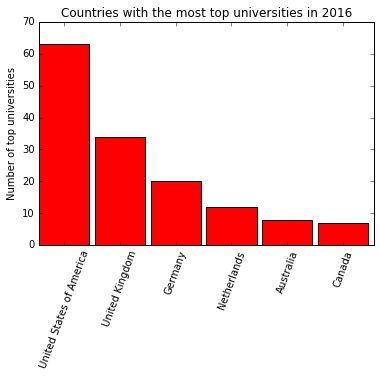

In [10]:
ind = np.arange(len(top_countries))
width = 0.9

plt.figure(figsize=(15,9),dpi = 30)
fig, ax = plt.subplots()
rects = ax.bar(ind,top_countries.values,width,color='r')
ax.set_xticklabels(top_countries.index)
ax.set_ylabel('Number of top universities')
ax.set_title('Countries with the most top universities in 2016')
ax.set_xticks(ind + 0.5*width)
plt.xticks(rotation = 70)
plt.show()


#2. Total scores over the years for top 10 schools

In [11]:
#take top 50 schools in 2016, and add another column that shows the average total score over 
#years for each of the top 50 schools

top_50_2016 = university[university["year"] == 2016].iloc[:50]

def ave_total_score(row):
    return university[university["university_name"] == row["university_name"]]["total_score"].mean()

#sort top 50 schools in 2016 by highest average score first
top_50_2016["ave_total_score"] = top_50_2016.apply(ave_total_score,axis = 1)
top_50_2016 = top_50_2016.sort_values("ave_total_score",ascending = False)
#grab the top 10 schools
top_10_schools = top_50_2016.iloc[:10]
print(top_10_schools[["university_name","ave_total_score"]])

                            university_name  ave_total_score
1803     California Institute of Technology        95.116667
1805                    Stanford University        93.750000
1808                     Harvard University        93.733333
1804                   University of Oxford        93.300000
1807  Massachusetts Institute of Technology        92.983333
1809                   Princeton University        92.250000
1806                University of Cambridge        92.216667
1815     University of California, Berkeley        89.650000
1810                Imperial College London        89.333333
1812                  University of Chicago        88.383333


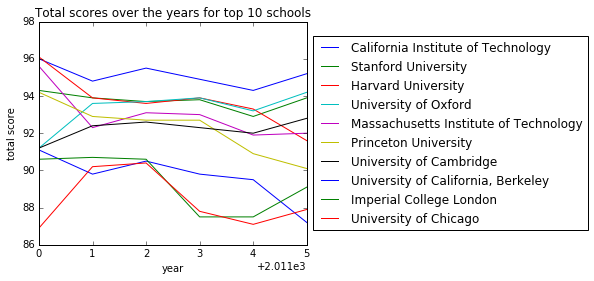

In [12]:
#for each school in top ten, access university_200 year and total score
schools = top_10_schools["university_name"]
fig = plt.figure()
ax = plt.subplot(111)

for school in schools:
    #for each school in the top 10 list, access the school's data for each year (2011-2016)
    school_df = university_200[university_200["university_name"]==school]
    ax.plot(school_df["year"],school_df["total_score"],label = school)
    
plt.xlabel("year")
plt.ylabel("total score")
plt.title("Total scores over the years for top 10 schools")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



#3. Show average percentage of internationals over the years for US schools, and for non-US schools

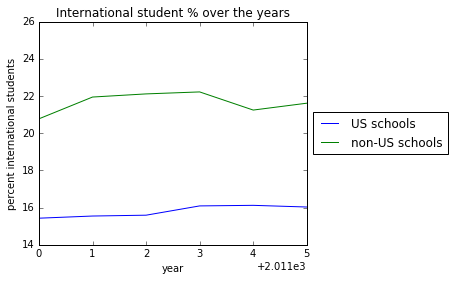

In [13]:
US_schools = university_200[university_200["country"] == "United States of America"]
US_Year_International = pd.DataFrame(US_schools[["year","international_students"]])
US_Year_International_pivot = pd.pivot_table(US_Year_International, index='year', values=['international_students'],aggfunc=np.mean)

non_US_schools = university_200[university_200["country"] != "United States of America"]
non_US_Year_International = pd.DataFrame(non_US_schools[["year","international_students"]])
non_US_Year_International_pivot = pd.pivot_table(non_US_Year_International,index = 'year',values=["international_students"],aggfunc=np.mean)

fig = plt.figure()
ax = plt.subplot(111)

ax.plot(US_Year_International_pivot.index,US_Year_International_pivot["international_students"],label = "US schools")
ax.plot(non_US_Year_International_pivot.index,non_US_Year_International_pivot["international_students"],label = "non-US schools")
plt.ylim((14,26))

plt.xlabel("year")
plt.ylabel("percent international students")
plt.title("International student % over the years")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#International_categories = ["US schools","non-US schools"]
#plt.legend(International_categories)

plt.show()


#4. Show average student to staff ratio over the years, for US schools and non-US schools

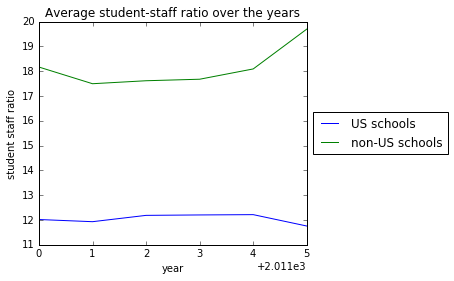

In [14]:
US_year_ratio = pd.DataFrame(US_schools[["year","student_staff_ratio"]])
US_year_ratio_pivot = pd.pivot_table(US_year_ratio,index = "year",values = ["student_staff_ratio"],aggfunc = np.mean)
non_US_year_ratio = pd.DataFrame(non_US_schools[["year","student_staff_ratio"]])
non_US_year_ratio_pivot = pd.pivot_table(non_US_year_ratio,index = 'year',values=["student_staff_ratio"],aggfunc=np.mean)

fig = plt.figure()
ax = plt.subplot(111)

ax.plot(US_year_ratio_pivot.index,US_year_ratio_pivot["student_staff_ratio"],label = "US schools")
ax.plot(non_US_year_ratio_pivot.index,non_US_year_ratio_pivot["student_staff_ratio"],label = "non-US schools")
#ratio_categories = ["US schools","non-US schools"]
#plt.legend(ratio_categories)
plt.xlabel("year")
plt.ylabel("student staff ratio")
plt.title("Average student-staff ratio over the years")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#5. How do citations,international students,male/female,student_staff ratio correlate graphically with total score.  Show in the year 2016.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

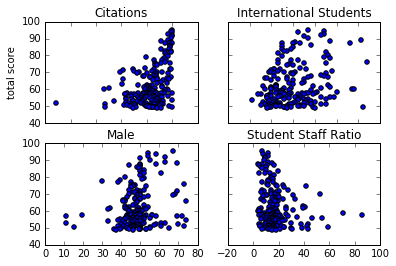

In [15]:
#let's start with 2016, can make subplots for each year maybe
university_200_2016 = university_200[university_200["year"]==2016]
#plot each category vs. total score, all have slight linear trends
#1. citations
#2. international students
#3. male, female
#4. student staff ratio

f, axarr = plt.subplots(2, 2)
axarr[0, 0].scatter(university_200_2016["citations"], university_200_2016["total_score"])
axarr[0, 0].set_title('Citations')
axarr[0, 0].set_ylabel('total score')
axarr[0, 1].scatter(university_200_2016["international_students"], university_200_2016["total_score"])
axarr[0, 1].set_title('International Students')
axarr[1, 0].scatter(university_200_2016["male"], university_200_2016["total_score"])
axarr[1, 0].set_title('Male')
axarr[1, 1].scatter(university_200_2016["student_staff_ratio"], university_200_2016["total_score"])
axarr[1, 1].set_title('Student Staff Ratio')

plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

##Machine Learning Practice

Split dataset into train and test set with "total score" as target variable: train on years 2011-2015, and test on 2016.  Start with linear regression.

In [19]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

train =  university_200[university_200["year"]!=2016]
test = university_200_2016

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

regressor = LinearRegression()
#predictors selected from analysis shown above
predictors = ['citations','student_staff_ratio',"income","male","female","international_students"]

regressor.fit(train[predictors],train['total_score'])
prediction = regressor.predict(test[predictors])

Prediction_comparison = pd.DataFrame({"real":test["total_score"],"prediction":prediction})
print(Prediction_comparison)

      prediction  real
1803   83.052888  95.2
1804   77.499039  94.2
1805   75.166386  93.9
1806   73.695750  92.8
1807   82.949182  92.0
1808   71.624955  91.6
1809   73.638848  90.1
1810   77.975641  89.1
1811   76.888867  88.3
1812   70.476456  87.9
1813   80.640253  87.6
1814   70.111267  87.4
1815   68.261793  87.2
1816   71.694503  87.1
1817   71.479583  86.1
1818   68.852437  85.8
1819   70.903258  85.2
1820   67.274979  84.0
1821   63.876021  83.9
1822   79.584362  82.7
1823   69.370738  82.4
1824   75.761744  82.3
1825   62.948949  81.3
1826   68.821659  80.3
1827   73.101677  79.5
1828   63.889219  79.2
1829   68.832740  78.2
1830   69.761456  77.5
1831   68.990437  77.3
1832   65.841866  77.2
...          ...   ...
1973   49.620219  51.1
1974   63.357325  51.0
1975   61.667117  51.0
1976   54.806280  50.9
1977   48.259754  50.8
1978   52.838829  50.6
1979   52.996825  50.6
1980   48.696465  50.5
1981   50.828744  50.3
1982   56.828843  50.2
1983   69.244071  50.2
1984   58.0

In [17]:
#calculate root mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test["total_score"], prediction)
rmse = mse **0.5
print("rmse = {0}".format(rmse))

rmse = 9.462244519551255


Compare linear regression with random forest, to see if error can be lowered further.

In [20]:
from sklearn.ensemble import RandomForestClassifier
alg = RandomForestClassifier(random_state=1,n_estimators=150,min_samples_split=4,min_samples_leaf=2)
alg.fit(train[predictors],train["total_score"])
Forest_prediction = alg.predict(test[predictors])

ForestMSE = mean_squared_error(test["total_score"],Forest_prediction)
Forestrmse = ForestMSE**0.5
print("rmse = {0}".format(Forestrmse))


rmse = 7.108878251876312
